<a href="https://colab.research.google.com/github/saniagonsalves/DM_assignment_part1/blob/main/F_Sania_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name - Sania Gonsalves

Random Forest

To predict covid death rate using random forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_columns', 100)

import sklearn.datasets as data
from sklearn.model_selection import train_test_split
import matplotlib as mpl
%matplotlib inline

# Import the required libraries
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset= pd.read_csv('/content/covid_19_data.csv', sep=',')


In [ ]:
#Read data from file
dataset = dataset.sample(n=10000,random_state=24)
dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
245412,245413,03/11/2021,Altai Republic,Russia,2021-04-02 15:13:53,16379.0,181.0,16166.0
63795,63796,07/13/2020,Ostergotland,Sweden,2021-04-02 15:13:53,3411.0,224.0,0.0
122512,122513,09/30/2020,Himachal Pradesh,India,2021-04-02 15:13:53,14976.0,186.0,11390.0
151705,151706,11/08/2020,Islamabad,Pakistan,2021-04-02 15:13:53,21861.0,241.0,19120.0
22187,22188,05/06/2020,NaN,Barbados,2021-04-02 15:13:53,82.0,7.0,47.0


In [ ]:
dataset.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
245412,245413,03/11/2021,Altai Republic,Russia,2021-04-02 15:13:53,16379.0,181.0,16166.0
63795,63796,07/13/2020,Ostergotland,Sweden,2021-04-02 15:13:53,3411.0,224.0,0.0
122512,122513,09/30/2020,Himachal Pradesh,India,2021-04-02 15:13:53,14976.0,186.0,11390.0
151705,151706,11/08/2020,Islamabad,Pakistan,2021-04-02 15:13:53,21861.0,241.0,19120.0
22187,22188,05/06/2020,NaN,Barbados,2021-04-02 15:13:53,82.0,7.0,47.0


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.keys()

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [ ]:
df = dataset.filter(items=['SNo','ObservationDate','Province/State','Country/Region','Confirmed','Deaths','Recovered'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 245412 to 87867
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              10000 non-null  int64  
 1   ObservationDate  10000 non-null  object 
 2   Province/State   7381 non-null   object 
 3   Country/Region   10000 non-null  object 
 4   Confirmed        10000 non-null  float64
 5   Deaths           10000 non-null  float64
 6   Recovered        10000 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 625.0+ KB


In [ ]:
df = pd.DataFrame.dropna(df,axis=0,how='any')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7381 entries, 245412 to 234976
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              7381 non-null   int64  
 1   ObservationDate  7381 non-null   object 
 2   Province/State   7381 non-null   object 
 3   Country/Region   7381 non-null   object 
 4   Confirmed        7381 non-null   float64
 5   Deaths           7381 non-null   float64
 6   Recovered        7381 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 461.3+ KB


In [ ]:
df.isnull().mean() * 100

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64

In [ ]:
df['Country/Region'].unique()

array(['Russia', 'Sweden', 'India', 'Pakistan', 'Brazil', 'Chile', 'US',
       'Mainland China', 'Canada', 'Japan', 'Netherlands', 'Spain',
       'Australia', 'Peru', 'Mexico', 'Italy', 'Belgium', 'Hong Kong',
       'France', 'Germany', 'Ukraine', 'UK', 'Colombia', 'Denmark',
       'Taiwan', 'Macau', 'Others', 'China'], dtype=object)

In [ ]:
df_without_lb = df.drop(['Country/Region'], axis=1)

In [ ]:
df_without_lb.loc[:,'Province/State'] = LabelEncoder().fit_transform(df.loc[:,'Province/State'].copy())
df_without_lb.loc[:,'Country/Region'] = LabelEncoder().fit_transform(df.loc[:,'Country/Region'].copy())
#df_without_lb.loc[:,'Last Update'] = LabelEncoder().fit_transform(df.loc[:,'Last Update'].copy())
df_without_lb.loc[:,'ObservationDate'] = LabelEncoder().fit_transform(df.loc[:,'ObservationDate'].copy())

df_without_lb

,SNo,ObservationDate,Province/State,Confirmed,Deaths,Recovered,Country/Region
245412,245413,111,11,16379.0,181.0,16166.0,21
63795,63796,312,400,3411.0,224.0,0.0,23
122512,122513,391,193,14976.0,186.0,11390.0,11
151705,151706,430,213,21861.0,241.0,19120.0,19
71953,71954,323,397,5447.0,81.0,4102.0,21
...,...,...,...,...,...,...,...
122116,122117,390,559,1029.0,31.0,0.0,23
95538,95539,355,78,684221.0,12418.0,0.0,26
275446,275447,188,214,1577.0,29.0,1538.0,25
228180,228181,66,384,38593.0,2740.0,0.0,16


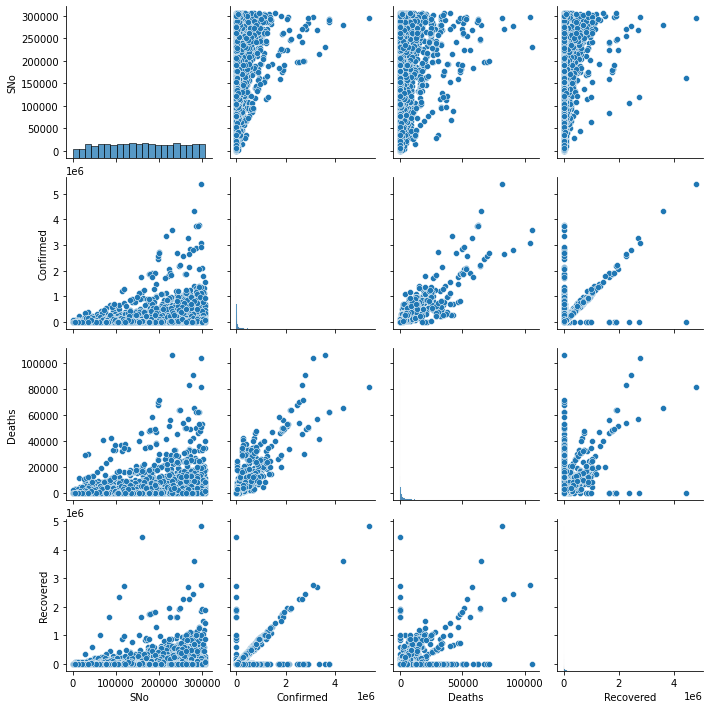

In [ ]:
sns.pairplot(df)

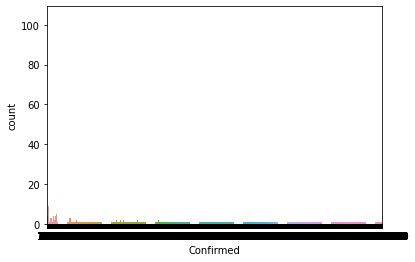

In [ ]:
ax = sns.countplot(data=df, x='Confirmed')

In [ ]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,7381.000000,7.381000e+03,7381.000000,7.381000e+03
mean,158395.266902,8.129375e+04,2031.473784,4.195112e+04
std,85616.223205,2.484988e+05,5905.665398,1.780724e+05
min,10.000000,0.000000e+00,0.000000,0.000000e+00
25%,84850.000000,1.328000e+03,19.000000,0.000000e+00
50%,158647.000000,1.235000e+04,250.000000,1.281000e+03
75%,232855.000000,5.034900e+04,1513.000000,1.720900e+04
max,306379.000000,5.378452e+06,106170.000000,4.826371e+06


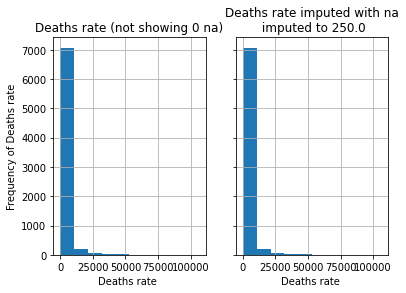

In [ ]:
# make some additional features
df['is_Confirmed_status'] = (df.Confirmed != 1).astype(np.int_)

df['Deaths_rate_imputed'] = df.Deaths.copy()
median_Deaths_rate = df.Deaths.dropna().median()
# note we ought to use a Pipeline here rather than 
# working off of the global median
df['Deaths_rate_imputed'] = df.Deaths.fillna(median_Deaths_rate)

#print(df.Age.isnull().sum(), df.age_imputed.isnull().sum())
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)
axs[0].set_title("Deaths rate (not showing {} na)".format(df.Deaths.isnull().sum()))
axs[1].set_title("Deaths rate imputed with na\n imputed to {}".format(df.Deaths.dropna().median()))
df.Deaths.hist(ax=axs[0])
df.Deaths.hist(ax=axs[1]);
axs[0].set_xlabel("Deaths rate ")
axs[1].set_xlabel("Deaths rate ")
axs[0].set_ylabel("Frequency of Deaths rate");

In [ ]:
df.query('is_Confirmed_status==True').Confirmed.dropna().median(), df.query('is_Confirmed_status==False').Confirmed.dropna().median()

(12549.5, 1.0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
df_ml = df[['SNo','Confirmed','Deaths','Recovered']].copy() 

In [ ]:
X = df_ml.drop('Confirmed', axis=1)
y = df_ml['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

X_train.head(20)
print(X)

           SNo   Deaths  Recovered
245412  245413    181.0    16166.0
63795    63796    224.0        0.0
122512  122513    186.0    11390.0
151705  151706    241.0    19120.0
71953    71954     81.0     4102.0
...        ...      ...        ...
122116  122117     31.0        0.0
95538    95539  12418.0        0.0
275446  275447     29.0     1538.0
228180  228181   2740.0        0.0
234976  234977   3859.0   254387.0

[7381 rows x 3 columns]


In [ ]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf_dummy.fit(X_train, y_train)
clf_dummy.score(X_test, y_test)

0.015167930660888408

           SNo   Deaths  Recovered
245412  245413    181.0    16166.0
63795    63796    224.0        0.0
122512  122513    186.0    11390.0
151705  151706    241.0    19120.0
71953    71954     81.0     4102.0
...        ...      ...        ...
122116  122117     31.0        0.0
95538    95539  12418.0        0.0
275446  275447     29.0     1538.0
228180  228181   2740.0        0.0
234976  234977   3859.0   254387.0

[7381 rows x 3 columns]


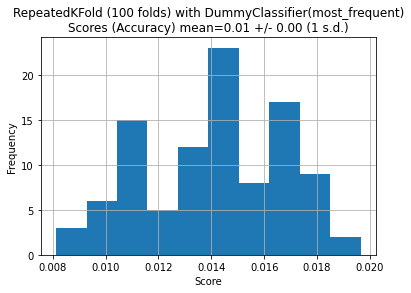

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
CV_N_REPEATS = 20
BINS = 10
strategy = "most_frequent"
clf_dummy = DummyClassifier(strategy=strategy)
scores = cross_val_score(clf_dummy, 
                         X, y, 
                         cv=RepeatedKFold(n_repeats=CV_N_REPEATS), 
                         scoring=None) 
scores_dummy = scores

score_line = f"Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with DummyClassifier({strategy})\n" + score_line);
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");
print(X)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, max_depth=9)  # hyperparameters optimised using BayesSearchCV
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

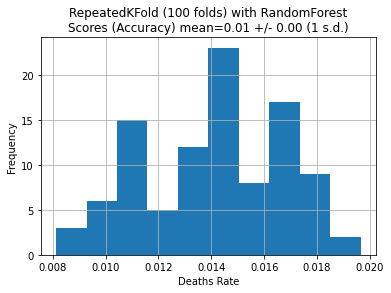

In [ ]:
score_line = f"Scores (Accuracy) mean={scores.mean():0.2f} +/- {scores.std():0.2f} (1 s.d.)"
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=BINS)
ax.set_title(f"RepeatedKFold ({len(scores)} folds) with RandomForest\n" + score_line);
ax.set_xlabel("Deaths Rate")
ax.set_ylabel("Frequency");

In [ ]:
scores = cross_val_score(clf, X, y, cv=RepeatedKFold(n_repeats=CV_N_REPEATS), n_jobs=-1)
scores_est = scores.copy()
print(f"Scores mean={scores.mean():0.01f} +/- {scores.std():0.01f} (1 s.d.)")
print(X)

Scores mean=0.1 +/- 0.0 (1 s.d.)
           SNo   Deaths  Recovered
245412  245413    181.0    16166.0
63795    63796    224.0        0.0
122512  122513    186.0    11390.0
151705  151706    241.0    19120.0
71953    71954     81.0     4102.0
...        ...      ...        ...
122116  122117     31.0        0.0
95538    95539  12418.0        0.0
275446  275447     29.0     1538.0
228180  228181   2740.0        0.0
234976  234977   3859.0   254387.0

[7381 rows x 3 columns]


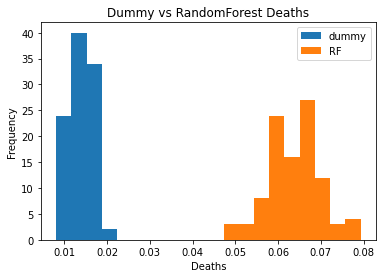

In [ ]:
fig, ax = plt.subplots()
df_dummy_est_scores = pd.DataFrame({'dummy': scores_dummy, 'RF': scores_est})
df_dummy_est_scores.plot(kind='hist', ax=ax, bins=20)
ax.set_xlabel("Deaths")
ax.set_title("Dummy vs RandomForest Deaths");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.06392199349945829

In [ ]:
clf_to_explain = clf
try:
    clf.__getattribute__("get_booster")
    clf_to_explain = clf.get_booster()
except AttributeError:
    pass
    print(X)

           SNo   Deaths  Recovered
245412  245413    181.0    16166.0
63795    63796    224.0        0.0
122512  122513    186.0    11390.0
151705  151706    241.0    19120.0
71953    71954     81.0     4102.0
...        ...      ...        ...
122116  122117     31.0        0.0
95538    95539  12418.0        0.0
275446  275447     29.0     1538.0
228180  228181   2740.0        0.0
234976  234977   3859.0   254387.0

[7381 rows x 3 columns]


In [ ]:
!pip install eli5
from eli5 import explain_weights
print(X)
feature_names = X.columns.values 
explain_weights(clf, feature_names=feature_names)

     |████████████████████████████████| 106 kB 5.4 MB/s 
           SNo   Deaths  Recovered
245412  245413    181.0    16166.0
63795    63796    224.0        0.0
122512  122513    186.0    11390.0
151705  151706    241.0    19120.0
71953    71954     81.0     4102.0
...        ...      ...        ...
122116  122117     31.0        0.0
95538    95539  12418.0        0.0
275446  275447     29.0     1538.0
228180  228181   2740.0        0.0
234976  234977   3859.0   254387.0

[7381 rows x 3 columns]


Weight,Feature
0.4463 ± 0.0851,SNo
0.3663 ± 0.0869,Recovered
0.1874 ± 0.0742,Deaths


In [ ]:
from yellowbrick import ROCAUC
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

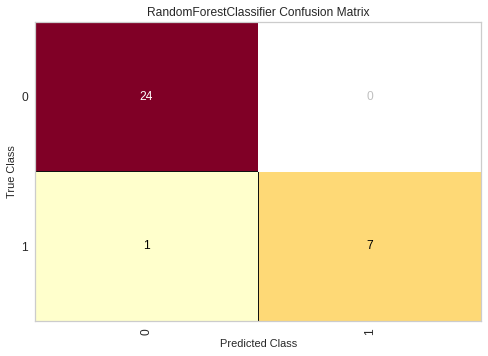

In [ ]:
fig, ax = plt.subplots()
cm = ConfusionMatrix(clf, classes=[0, 1], ax=ax)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_test, y_test)

#How did we do?
cm.poof()

In [ ]:
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

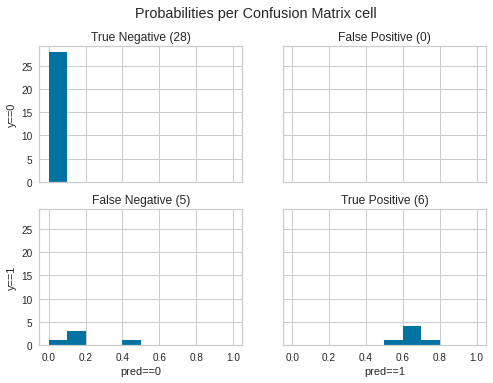

In [ ]:
df_predictions = pd.DataFrame({'y': y_test, 'y_proba': y_pred_proba[:,1]})
fig, axs = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)
# show true-pos 

bins = np.arange(0, 1.01, 0.1)

def show_quarter(df, query, col, title, ax, bins, x_label=None, y_label=None):
    results = df.query(query)
    results[col].hist(ax=ax, bins=bins); 
    if y_label:
        ax.set_ylabel(y_label)
    if x_label:
        ax.set_xlabel(x_label)
    ax.set_title(title + " ({})".format(results.shape[0])) #IANBOB
show_quarter(df_predictions, "y==0 and y_proba < 0.5", "y_proba", "True Negative", axs[0][0], bins, y_label="y==0")
show_quarter(df_predictions, "y==0 and y_proba >= 0.5", "y_proba", "False Positive", axs[0][1], bins)
show_quarter(df_predictions, "y==1 and y_proba >= 0.5", "y_proba", "True Positive", axs[1][1], bins, x_label="pred==1")
show_quarter(df_predictions, "y==1 and y_proba < 0.5", "y_proba", "False Negative", axs[1][0], bins, x_label="pred==0", y_label="y==1")
fig.suptitle("Probabilities per Confusion Matrix cell");

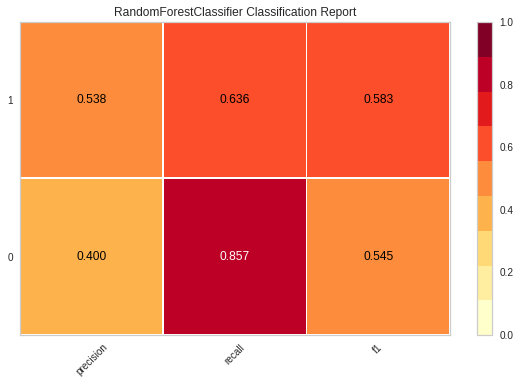

In [ ]:
fig, ax = plt.subplots()
visualizer = ClassificationReport(clf, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()  

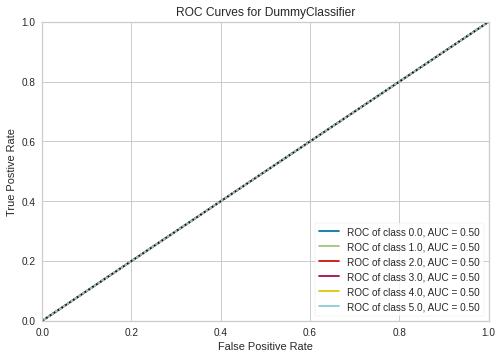

In [ ]:
visualizer = ROCAUC(clf_dummy, micro=False, macro=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

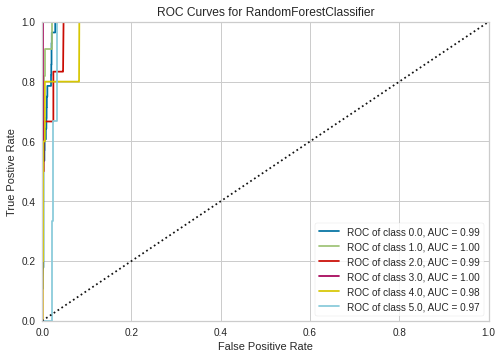

In [ ]:
visualizer = ROCAUC(clf, micro=False, macro=False, per_class=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

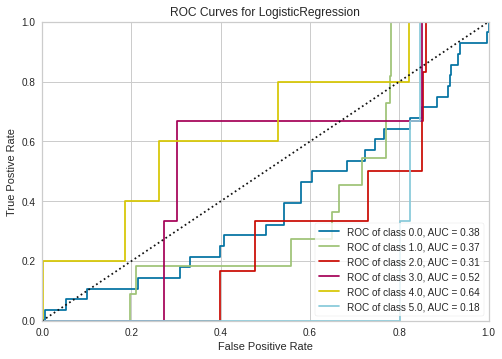

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
visualizer = ROCAUC(clf_lr, micro=False, macro=False, per_class=True)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

In [ ]:
estimator = clf.estimators_[5]

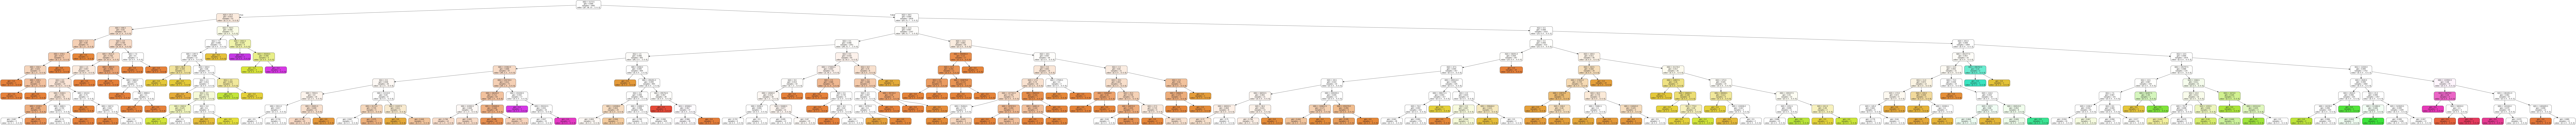

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
# Export as dot file
export_graphviz(estimator, 
                out_file=dot_data, 
                rounded = True, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#Conclusion: SNo,	Confirmed_rate,	Death rate and	Recovered cases
print('\nResult : 0 - Low Death Rate')
print('Result : 1 - High Death Rate')

print('\n\nExample 1 : SNo : 37406, Death Rate : 5.0, Recovered Cases : 42.0')
print("Predicted Death Rate : ",clf.predict(np.array([[37406,5.0,42.0]])))

print('\n\nExample 2 : SNo : 123880, Death Rate : 231.0, Recovered Cases : 13060.0')
print("Predicted Death Rate : ",clf.predict(np.array([[123880,231.0,13060.0]])))

print('\n\nExample 3 : SNo : 103793, Death Rate : 1.0, Recovered Cases : 0.0')
print("Predicted Death Rate : ",clf.predict(np.array([[103793,1.0,0.0]])))

print('\n\nExample 4 : SNo : 23454, Death Rate : 7.0, Recovered Cases : 626.0')
print("Predicted Death Rate : ",clf.predict(np.array([[23454,7.0,626.0]])))

#Conclusion: SNo, Confirmed_rate, Death rate and Recovered cases
Result : 0 - Low Death Rate Result : 1 - High Death Rate

Example 1 : SNo : 37406, Death Rate : 5.0, Recovered Cases : 42.0 Predicted Death Rate : 37406,5.0,42.0

Example 2 : SNo : 123880, Death Rate : 231.0, Recovered Cases : 13060.0 Predicted Death Rate : 123880,231.0,13060.0

Example 3 : SNo : 103793, Death Rate : 1.0, Recovered Cases : 0.0 Predicted Death Rate : 103793,1.0,0.0

Example 4 : SNo : 23454, Death Rate : 7.0, Recovered Cases : 626.0 Predicted Death Rate : 23454,7.0,626.0

Here we are predicting the Death Rate for a given Province/State, based on its COVID-19 cases.